# <a href="https://colab.research.google.com/github/jupyteronline/notebooks/blob/master/6_nlp-I/실습-1_word2vec_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [3]:
corpus = remove_stop_words(corpus)

In [4]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [5]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [6]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [7]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [8]:
word2int

{'boy': 1,
 'girl': 4,
 'king': 9,
 'man': 8,
 'pretty': 10,
 'prince': 5,
 'princess': 6,
 'queen': 0,
 'strong': 2,
 'wise': 3,
 'woman': 11,
 'young': 7}

In [9]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [10]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [11]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [12]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [13]:
df.shape

(52, 2)

In [14]:
# import os
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

# import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings

In [15]:
# Create a sublist of lower case words for each tweet
words_in_sentence = sentences

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
sentence_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_sentence]

# Remove collection words
collection_words = ['climatechange', 'climate', 'change']

sentence_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in sentence_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Explore Co-occurring Words (Bigrams)

To identify co-occurrence of words in the sentences, you can use bigrams from nltk.

Begin with a list comprehension to create a list of all bigrams (i.e. co-occurring words) in the sentences.

In [16]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(word)) for word in sentence_nsw_nc]

# View bigrams for the first word
terms_bigram[0]

[('king', 'strong'), ('strong', 'man')]

Notice that the words are paired by co-occurrence. You can remind yourself of the original sentence or the cleaned list of words to see how co-occurrence is identified.

In [17]:
# Clean tweet 
sentence_nsw_nc[0]

['king', 'strong', 'man']

Similar to what you learned in the previous lesson on word frequency counts, you can use a counter to capture the bigrams as dictionary keys and their counts are as dictionary values.

Begin by flattening the list of bigrams. You can then create the counter and query the top 20 most common bigrams across the tweets.

In [18]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('king', 'strong'), 1),
 (('strong', 'man'), 1),
 (('queen', 'wise'), 1),
 (('wise', 'woman'), 1),
 (('boy', 'young'), 1),
 (('young', 'man'), 1),
 (('girl', 'young'), 1),
 (('young', 'woman'), 1),
 (('prince', 'young'), 1),
 (('young', 'king'), 1),
 (('princess', 'young'), 1),
 (('young', 'queen'), 1),
 (('man', 'strong'), 1),
 (('woman', 'pretty'), 1),
 (('prince', 'boy'), 1),
 (('boy', 'king'), 1),
 (('princess', 'girl'), 1),
 (('girl', 'queen'), 1)]

In [19]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(king, strong)",1
1,"(strong, man)",1
2,"(queen, wise)",1
3,"(wise, woman)",1
4,"(boy, young)",1
5,"(young, man)",1
6,"(girl, young)",1
7,"(young, woman)",1
8,"(prince, young)",1
9,"(young, king)",1


#Visualize Networks of Bigrams

In [20]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [21]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

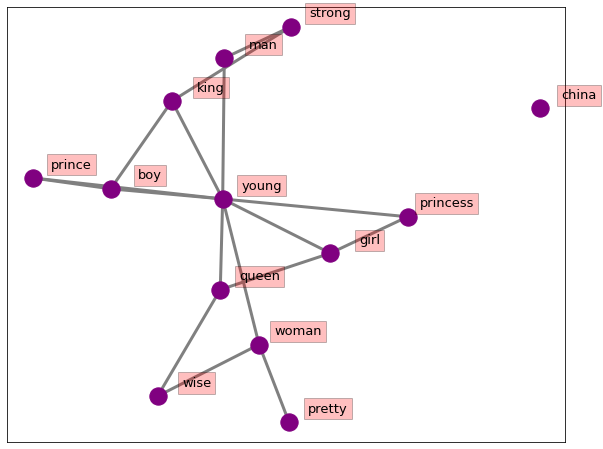

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# Define Tensorflow Graph

In [23]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

TensorFlow 1.x selected.


# Train

In [24]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.004192
iteration 3000 loss is :  1.8897564
iteration 6000 loss is :  1.8170419
iteration 9000 loss is :  1.7735487
iteration 12000 loss is :  1.7448776
iteration 15000 loss is :  1.7272662
iteration 18000 loss is :  1.717637


In [25]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 0.69616634 -0.20721728]
 [-1.0676161  -1.7779016 ]
 [-4.6943984  -4.905964  ]
 [ 4.0089545  -3.9959364 ]
 [ 1.0661898  -1.242824  ]
 [-1.6270728  -4.8700686 ]
 [ 1.6039965  -3.6834004 ]
 [ 0.05765498 -0.3910151 ]
 [-0.63197535 -0.3788743 ]
 [-0.7124846  -0.6546814 ]
 [ 3.8236794  -1.1491269 ]
 [ 0.27576572  0.07271796]]


# word vector in table

In [26]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,queen,0.696166,-0.207217
1,boy,-1.067616,-1.777902
2,strong,-4.694398,-4.905964
3,wise,4.008955,-3.995936
4,girl,1.066190,-1.242824
5,prince,-1.627073,-4.870069
6,princess,1.603997,-3.683400
7,young,0.057655,-0.391015
8,man,-0.631975,-0.378874
9,king,-0.712485,-0.654681


# word vector in 2d chart

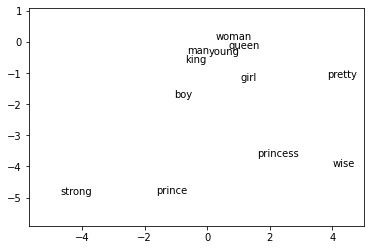

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

### 참고

워드 임베딩(word embedding) 방법론

https://medium.com/@omicro03/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-nplm-f7d0f472ce68

딥 러닝을 이용한 자연어 처리 입문

https://wikidocs.net/book/2155